In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sandeep0000","key":"ef652dbf720db9517b32984e8fbc4da2"}'}

In [2]:
!ls -lha kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 67 May 17 17:42 kaggle.json


In [3]:
!kaggle datasets download -d grassknoted/asl-alphabet

100% 1.02G/1.03G [00:11<00:00, 127MB/s]
100% 1.03G/1.03G [00:11<00:00, 93.1MB/s]


In [4]:
!nvidia-smi

Sun May 17 17:43:21 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!unzip \*.zip

In [0]:
import os
base_dir = '/content/asl_alphabet_train/asl_alphabet_train/'
train_dir = os.path.join(base_dir)

In [7]:
for alphabet in os.listdir(base_dir):
    print(str(len(os.listdir(base_dir + alphabet))) + " " + alphabet + " images")

3000 O images
3000 K images
3000 A images
3000 P images
3000 F images
3000 nothing images
3000 Y images
3000 R images
3000 G images
3000 del images
3000 W images
3000 X images
3000 L images
3000 N images
3000 J images
3000 H images
3000 E images
3000 T images
3000 I images
3000 B images
3000 Q images
3000 D images
3000 U images
3000 space images
3000 V images
3000 M images
3000 S images
3000 C images
3000 Z images


In [8]:
len(os.listdir(base_dir))

29

Using TensorFlow backend.


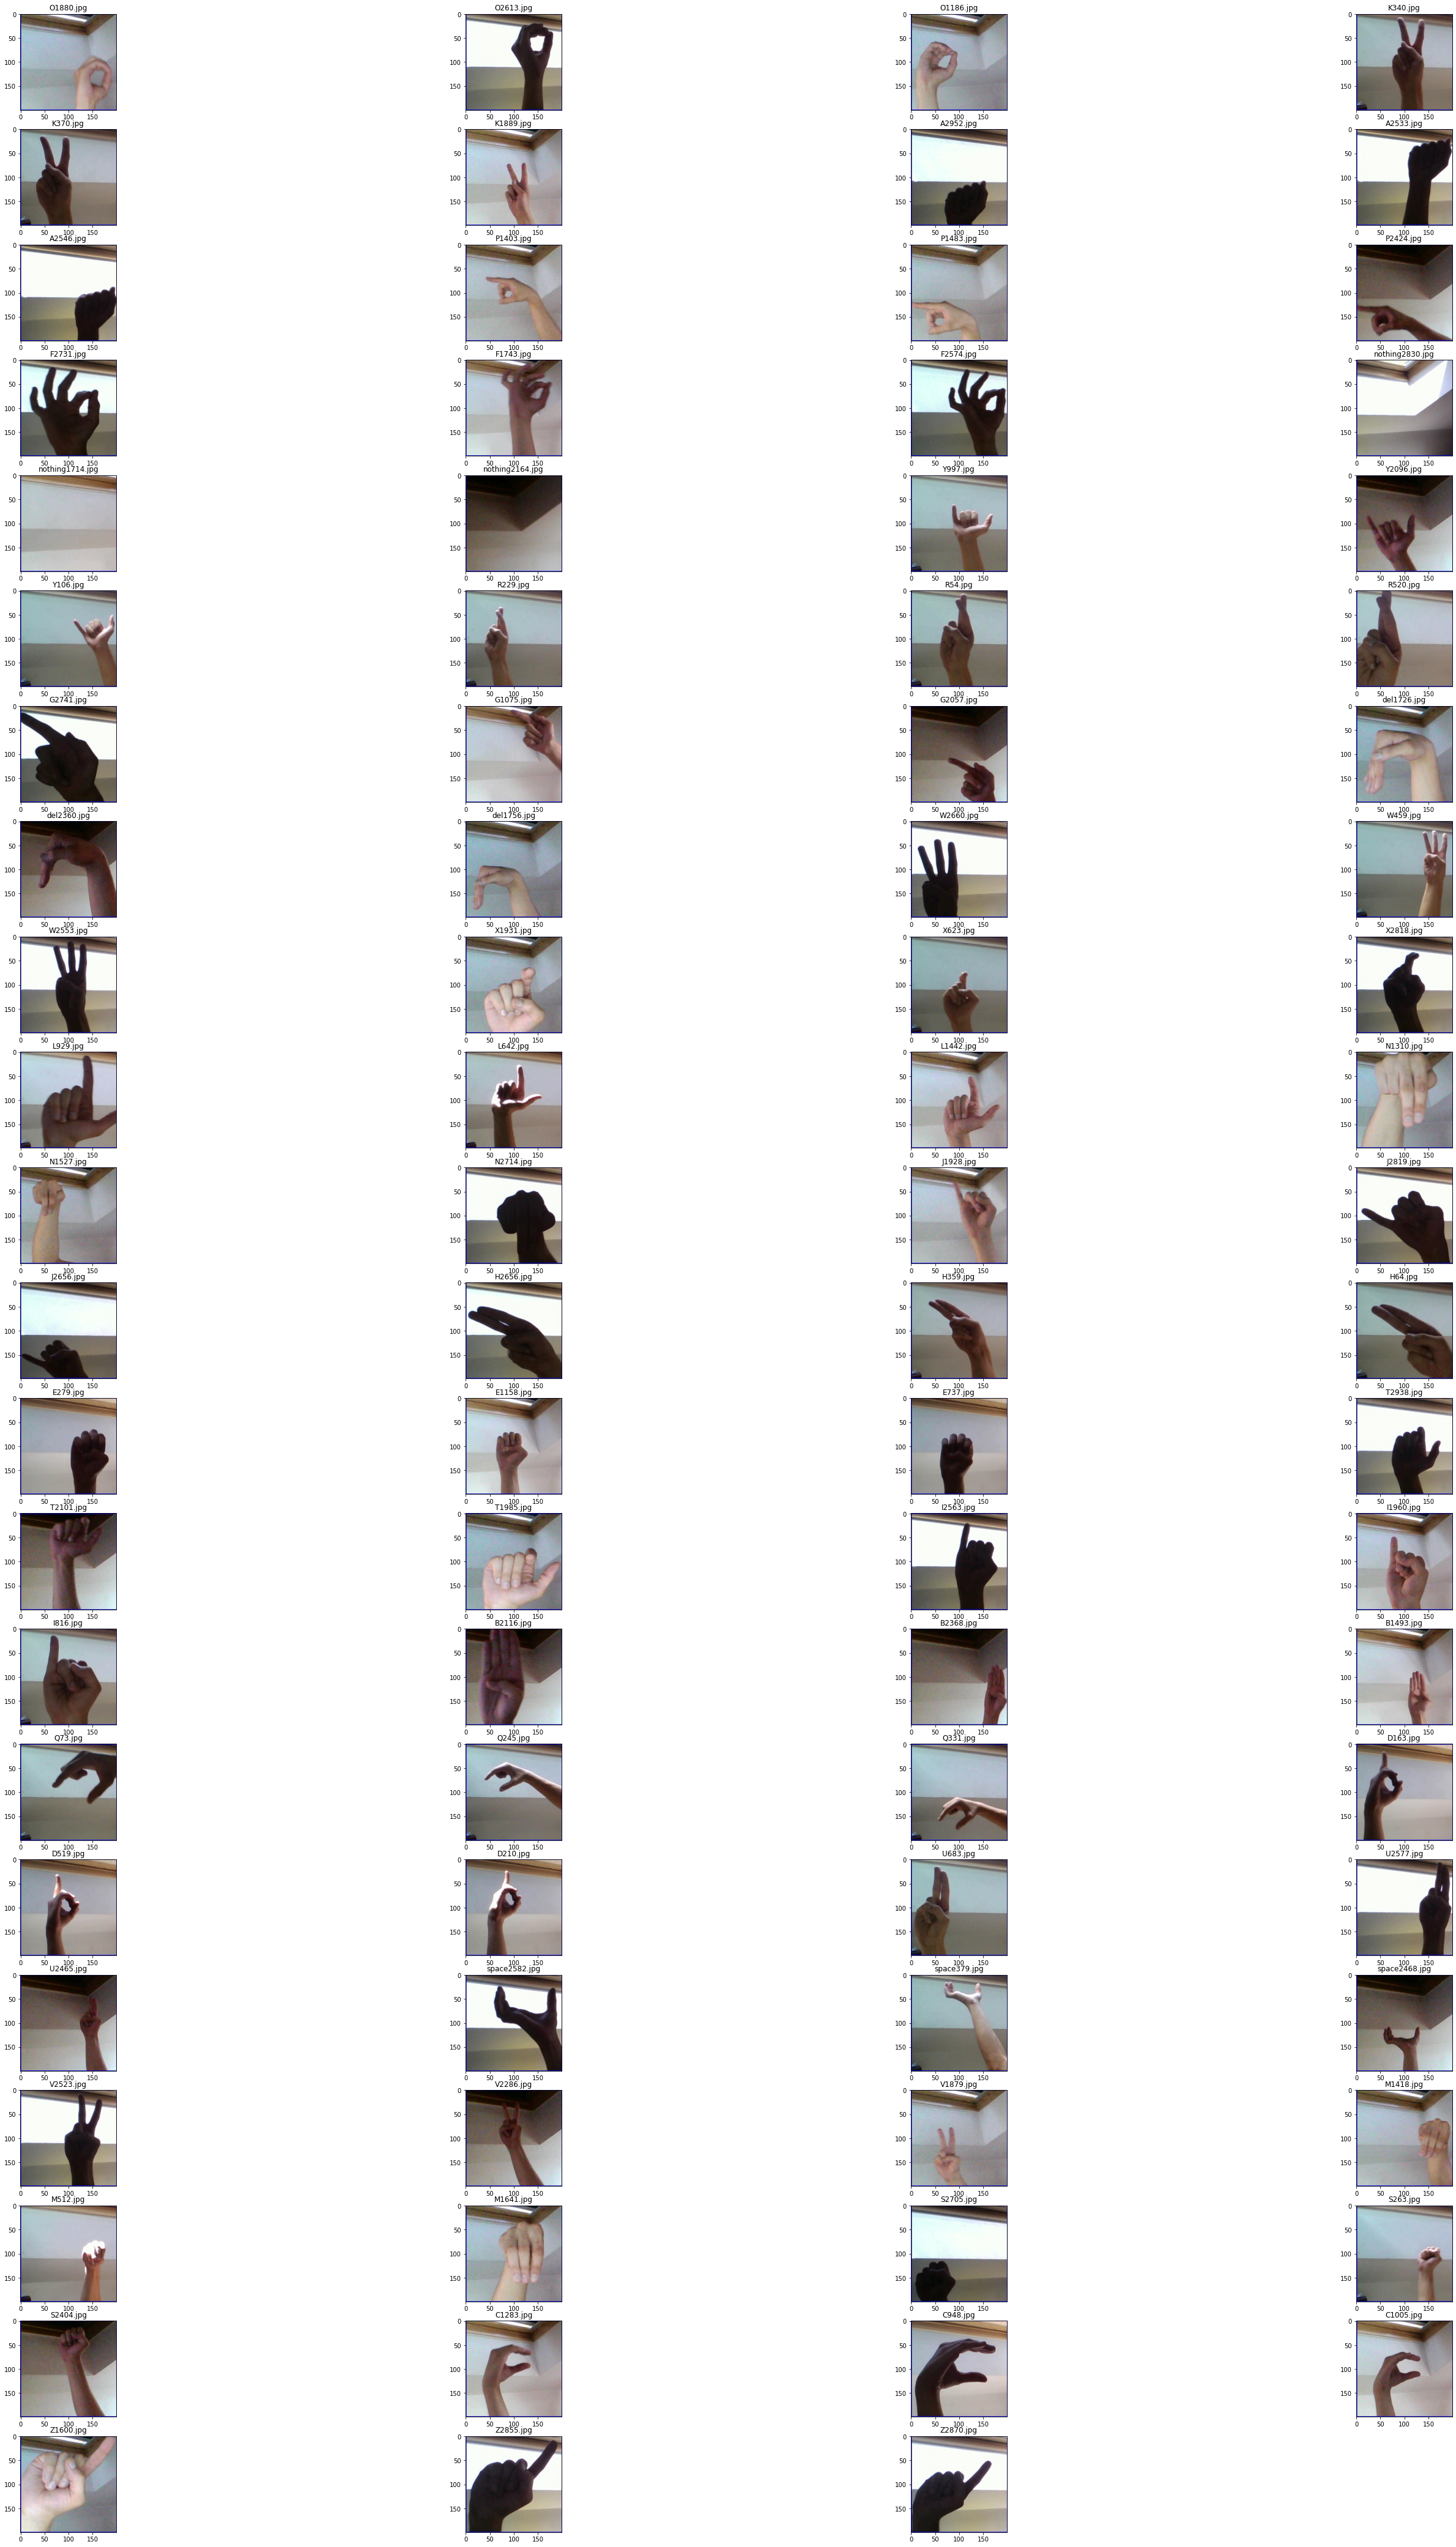

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import load_img,img_to_array

plt.figure(0, figsize=(50,100))
cpt = 0
pic_size = 200 # Original dataset size

for alphabet in os.listdir(base_dir):
    for i in range(0,3):
        cpt = cpt + 1
        plt.subplot(29,4,cpt)
        img = load_img(base_dir + alphabet + "/" +os.listdir(base_dir + alphabet)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")
        plt.title(os.listdir(base_dir + alphabet)[i])

#plt.tight_layout()
plt.show()

In [14]:

from keras.preprocessing.image import ImageDataGenerator

batch_size = 32
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory(base_dir,
                                                    target_size=(48,48),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 87000 images belonging to 29 classes.


In [0]:
from keras.layers import Dense
from keras.layers import Dropout,Input
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.models import Model,Sequential
from keras.optimizers import Adam

In [0]:
nb_classes = 29

model = Sequential()
#1
model.add(Conv2D(64,(3,3), padding = 'same', input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2
model.add(Conv2D(128,(5,5), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#3
model.add(Conv2D(512,(3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#4
model.add(Conv2D(64,(3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Flattening
model.add(Flatten())

#Full connected layer 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Full connected layer 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation = 'softmax'))

opt = Adam(lr = 0.0001)

model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_7 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_7 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 128)      

In [18]:
epochs = 30
from keras.callbacks import ModelCheckpoint

#checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoint]
#steps per epoch = 28273/128 = 220
history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs = epochs,
                                verbose = 1)

Epoch 1/30
2718/2718 [==============================] - 130s 48ms/step - loss: 2.3451 - accuracy: 0.3057
Epoch 2/30
2718/2718 [==============================] - 125s 46ms/step - loss: 0.9602 - accuracy: 0.6855
Epoch 3/30
2718/2718 [==============================] - 125s 46ms/step - loss: 0.4947 - accuracy: 0.8348
Epoch 4/30
2718/2718 [==============================] - 125s 46ms/step - loss: 0.3028 - accuracy: 0.9003
Epoch 5/30
2718/2718 [==============================] - 123s 45ms/step - loss: 0.2049 - accuracy: 0.9316
Epoch 6/30
2718/2718 [==============================] - 123s 45ms/step - loss: 0.1508 - accuracy: 0.9497
Epoch 7/30
2718/2718 [==============================] - 123s 45ms/step - loss: 0.1202 - accuracy: 0.9599
Epoch 8/30
2718/2718 [==============================] - 125s 46ms/step - loss: 0.0957 - accuracy: 0.9688
Epoch 9/30
2718/2718 [==============================] - 126s 46ms/step - loss: 0.0776 - accuracy: 0.9743
Epoch 10/30
2718/2718 [==============================] 

In [0]:
model.save('model.h5')

In [0]:

from numpy import loadtxt
from keras.models import load_model
model = load_model('model.h5')
model.summary()


In [0]:
TEST_DIR = '/content/asl_alphabet_test/asl_alphabet_test/'
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [0]:
#x.append(cv2.resize(cv2.cvtColor(cv2.imread(image), (48,48),cv2.COLOR_BGR2GRAY), interpolation=cv2.INTER_CUBIC))

import cv2
def prepare_data(list_of_images):

    x = [] 
    y = [] 
    
    for image in list_of_images:
      img = cv2.imread(image)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = cv2.resize(img, (48,48), interpolation = cv2.INTER_CUBIC)
      x.append(img)

    for i in list_of_images:

      if 'A_test' in i:
        y.append('A')

      elif 'B_test' in i:
        y.append('B')

      elif 'C_test' in i:
        y.append('C')

      elif 'D_test' in i:
        y.append('D')

      elif 'E_test' in i:
        y.append('E')

      elif 'F_test' in i:
        y.append('F')

      elif 'G_test' in i:
        y.append('G')

      elif 'H_test' in i:
        y.append('H')

      elif 'I_test' in i:
        y.append('I')

      elif 'J_test' in i:
        y.append('J')

      elif 'K_test' in i:
        y.append('K')

      elif 'L_test' in i:
        y.append('L')
     
      elif 'M_test' in i:
        y.append('M')

      elif 'N_test' in i:
        y.append('N')

      elif 'O_test' in i:
        y.append('O')
    
      elif 'P_test' in i:
        y.append('P')

      elif 'Q_test' in i:
        y.append('Q')

      elif 'R_test' in i:
        y.append('R')

      elif 'S_test' in i:
        y.append('S')

      elif 'T_test' in i:
        y.append('T')

      elif 'U_test' in i:
        y.append('U')

      elif 'V_test' in i:
        y.append('V')

      elif 'W_test' in i:
        y.append('W')

      elif 'X_test' in i:
        y.append('X')

      elif 'Y_test' in i:
        y.append('Y')

      elif 'Z_test' in i:
        y.append('Z')

      elif 'nothing_test' in i:
        y.append('nothing')

      elif 'space_test' in i:
        y.append('space')

      elif 'del' in i:
        y.append('del')

    return x, y

In [0]:
from keras import backend as K
X_test, Y_test = prepare_data(test_images) 

In [0]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [0]:
import numpy as np

X_test = np.asarray(X_test)

In [0]:
X_test = np.reshape(X_test,(28,48,48,1))

In [115]:
X_test.shape

(28, 48, 48, 1)

In [0]:
Y_test.append('del')

In [0]:
Y_test = np.asarray(Y_test)

In [121]:
import numpy as np
#test_generator = test_datagen.flow(np.array(X_test), batch_size=batch_size)
test_generator = test_datagen.flow(np.array(X_test), Y_test, batch_size=batch_size)
prediction_probabilities = model.predict_generator(test_generator, verbose=1)

ValueError: ignored

In [120]:
accuracy1 = model.evaluate_generator(X_test,Y_test)

TypeError: ignored

In [119]:
accuracy1 = model.evaluate(X_test,Y_test)

ValueError: ignored

In [0]:
model.evaluate()

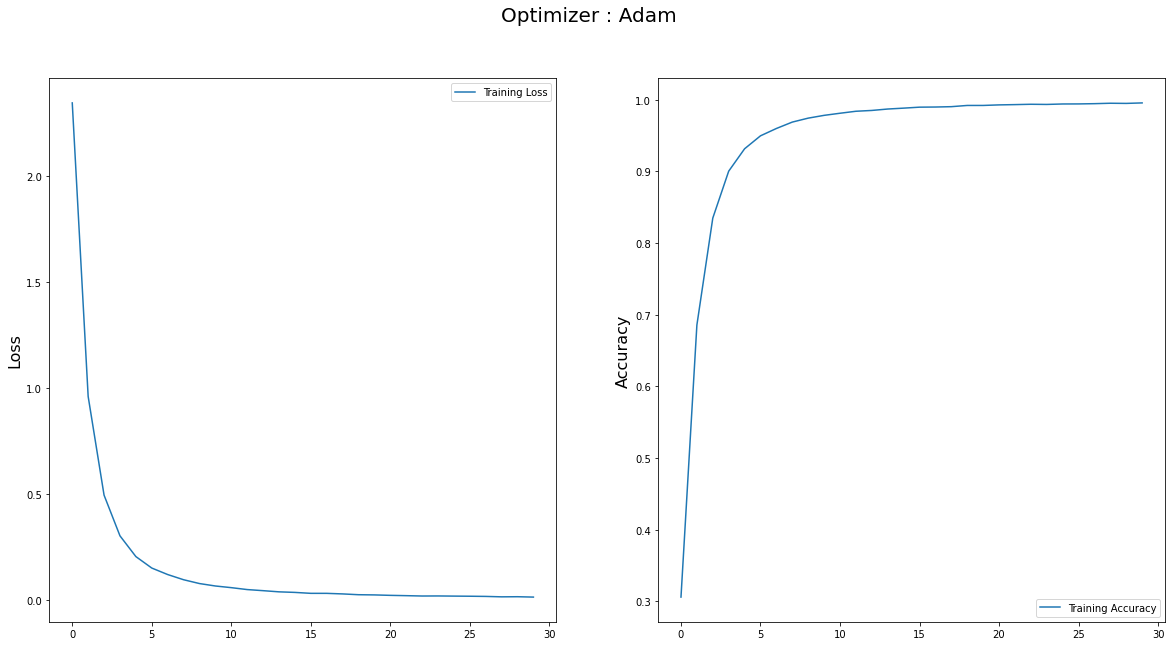

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=20)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
#########################################################################
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
#plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()